# Challenge: If a Tree Falls in The Forest
Unit 3 / Lesson 2 / Project 6

Now that you've learned about random forests and decision trees let's do an exercise in accuracy.

You know that random forests are basically a collection of decision trees, but how do the accuracies of the two models compare?

So here's what you should do.
Pick a dataset.
It could be one you've worked with before or it could be a new one.
Then build the best decision tree you can.

Now try to match that with the simplest random forest you can.
For our purposes measure simplicity with [runtime](https://stackoverflow.com/questions/1557571/how-do-i-get-time-of-a-python-programs-execution).
Compare that to the runtime of the decision tree.

Hopefully out of this you'll see the power of random forests, but also their potential costs.
Remember, in the real world you won't necessarily be dealing with thousands of rows.
It could be millions, billions, or even more.

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
from sklearn.externals.six import StringIO

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

Let's load our dataset.
We're using the Pima Indian Diabetes dataset.
You can download the data from Kaggle [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

In [2]:
# load dataset
PATH = ('assets/diabetes.csv')

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

pima = pd.read_csv(PATH, header=0, names=col_names)

display(pima.info())
pima.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant    768 non-null int64
glucose     768 non-null int64
bp          768 non-null int64
skin        768 non-null int64
insulin     768 non-null int64
bmi         768 non-null float64
pedigree    768 non-null float64
age         768 non-null int64
label       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0) # 70% training and 30% test

In [5]:
# measure our model's runtime
import time
start_time = time.time()

# Initialize our decision tree.
clf = DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state=0
)

# Train Decision Tree Classifer
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
clf_score = cross_val_score(clf, X, y, cv=10)
display(clf_score)
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (clf_score.mean(), clf_score.std() * 2))

# display model runtime
print("Runtime: %s seconds" % round(time.time() - start_time, 2))

array([0.71428571, 0.7012987 , 0.74025974, 0.63636364, 0.72727273,
       0.71428571, 0.72727273, 0.77922078, 0.63157895, 0.81578947])

Decision Tree Accuracy: 0.72 (+/- 0.11)
Runtime: 0.16 seconds


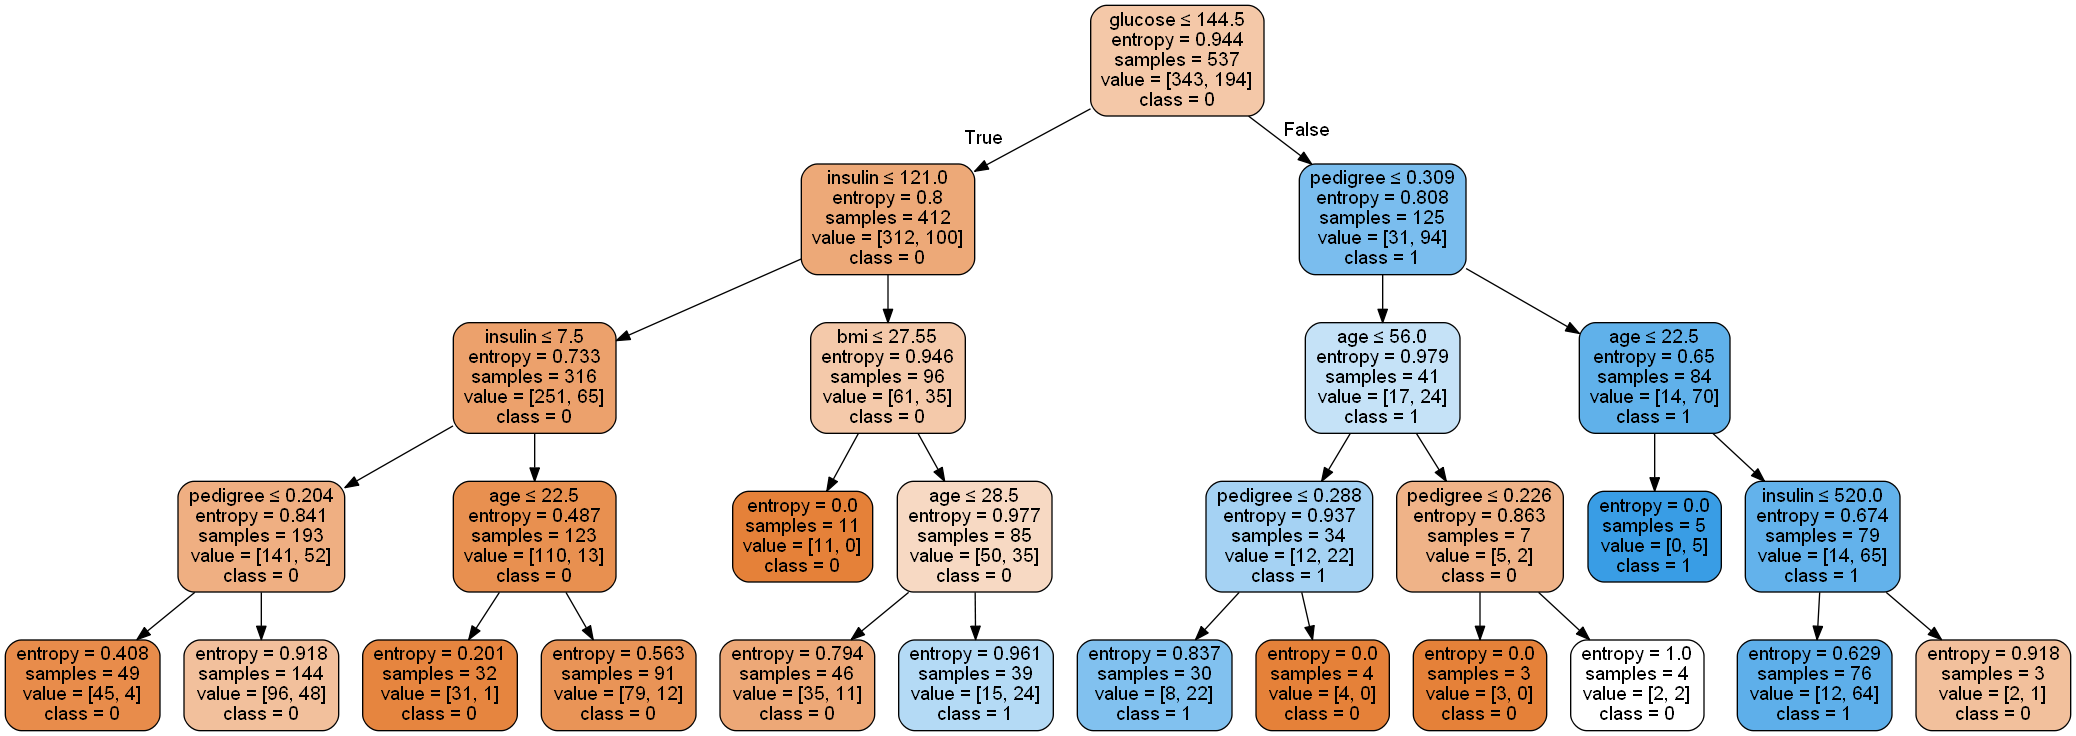

In [6]:
# render our tree
dot_data = StringIO()
tree.export_graphviz(
    clf, out_file=dot_data, filled=True, rounded=True, special_characters=True,
    feature_names = feature_cols, class_names=['0','1']
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('diabetes.png') # remove comment to save decision tree locally
display(Image(graph.create_png()))

Looks like our Decision Tree model a runtime of about 0.16 seconds and an accuracy of approximately 72%, give or take 11%.
That's not great. Especially considering our cross validation test produced $R^2$ values within a range of 63%-81%.

Let's see how our Random Forest model compares.

In [7]:
# measure our model's runtime
import time
start_time = time.time()

# Initialize our decision tree.
rfc = ensemble.RandomForestClassifier(n_estimators=10)

# Train Random Forest Classifer
rfc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = rfc.predict(X_test)

# Model Accuracy, how often is the classifier correct?
rfc_score = cross_val_score(rfc, X, y, cv=10)
display(rfc_score)
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (rfc_score.mean(), rfc_score.std() * 2))

# display model runtime
print("Runtime: %s seconds" % round(time.time() - start_time, 2))

array([0.74025974, 0.75324675, 0.74025974, 0.68831169, 0.72727273,
       0.76623377, 0.77922078, 0.81818182, 0.72368421, 0.75      ])

Random Forest Accuracy: 0.75 (+/- 0.07)
Runtime: 0.81 seconds


Our Random Forest model had a runtime of about 0.2 seconds with an accuracy of 75%, give or take 7%.
This is more accurate than our Decision Tree model, but comparatively took much longer to run.